This notebook details the Automotive Dealership Dataset that was scraped from Cars.com, covering data cleaning and exploratory data analysis. Each step includes Python code accompanied by concise explanations using Markdown LaTeX format.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files, to use the software without restriction, and to allow others to do so, provided that:

**Written permission from the author is required for the reproduction or distribution of the software, including any code and datasets contained therein.**

**THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.**

# Market Analysis of Vehicle Listings


### Objectives:
This report aims to provide a comprehensive analysis of current market trends using data from Cars.com, specifically focusing on the most popular brands and models, key vehicle features, and pricing trends. The analysis will help dealerships optimize their inventory, pricing strategies, and marketing efforts to meet consumer demand more effectively. The report highlights the following key areas:

**Popular Brands and Models:**

- Identify the top brands and models listed, with a particular focus on BMW and Mercedes-Benz, which are the most listed brands, and the Mercedes-Benz EQS 450, which is the most listed model.
Highlight the popularity of large commercial vans, such as the ProMaster 3500 and the Mercedes-AMG E 53.

**Popular Features:**

- Analyze the prevalence of automatic versus manual transmissions.
- Examine the distribution of fuel types, noting the dominance of gasoline vehicles and the lesser presence of hybrid and diesel options.
- Present the fuel efficiency (MPG) of both luxury and non-luxury vehicles, identifying brands with the highest and lowest MPG.
- Discuss the relationship between the number of cylinders, vehicle pricing, and fuel efficiency.

**Pricing Trends:**

- Compare the average prices of new and used luxury vehicles, noting that Aston has the highest average price for new luxury vehicles, while Bugatti has the highest average price for used luxury vehicles.
- Compare the average prices of new and used non-luxury vehicles, noting that Ford has the highest average price for new non-luxury vehicles, while INEOS has the highest average price for used non-luxury vehicles.

**Geographic Insights:**

- Provide city-specific inventory insights, highlighting which brands and models are most listed in various cities (e.g., Mercedes-Benz in Los Angeles, BMW in New York, RAM in Columbus, Ford in Houston).

**Actionable Insights for Dealerships:**

- Recommend stocking more popular brands and models to meet market demand.
- Emphasize the importance of having a higher inventory of vehicles with automatic transmissions.
- Suggest competitive pricing strategies based on vehicle age, mileage, and fuel efficiency.
- Advise on tailoring inventory based on city-specific trends.
- Highlight the fuel efficiency of high-MPG brands to attract fuel-conscious consumers.

By understanding these trends and insights, dealerships can better align their inventory and pricing strategies to maximize sales and effectively meet consumer demand.

## 1. Importing Required Libraries

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

In [91]:
# Show all columns
pd.set_option('display.max_columns', None)  # Will show all columns

## 2. Reading CSV

In [92]:
file = '../cars_dot_com/data/cars_by_popular_cities.csv'
df = pd.read_csv(file)
df.head()

,vin,stock_number,zip_code,status,year,brand,model,mileage,exterior_color,interior_color,drive_train,mpg,fuel_type,transmission,engine,price,seller_name,seller_rating,consumer_rating,comfort,interior,performance,value,exterior,reliability,accidents_or_damage,1_owner_vehicle,city,state
0,1P9PA1821VB213001,197C,30371,Used,1997,Panoz,AIV Roadster,2341,Black,Tan,Unknown,0-0,Unknown,5 Speed Manual,–,64900,Collectible Motor Car of Atlanta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None reported,False,atlanta,ga
1,1GCDC14H9JZ147008,881C,30371,Used,1988,Chevrolet,1500,183122,Burgundy Metallic,Burgundy,Unknown,0-0,Unknown,700R4,–,19900,Collectible Motor Car of Atlanta,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,At least 1 accident or damage reported,False,atlanta,ga
2,1C4RJXN69RW294275,514467,30371,New,2024,Jeep,Wrangler 4xe Sport,11,Black Clearcoat,Black,4WD,NaN,Hybrid,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo Hybrid,45795,Ed Voyles Chrysler Dodge Jeep RAM,4.7,3.5,3.5,4.0,3.5,3.0,4.5,3.0,NaN,NaN,atlanta,ga
3,1C4RJXN61RW305494,513612,30371,New,2024,Jeep,Wrangler 4xe Sport,20,Bright White Clearcoat,Black,4WD,NaN,Hybrid,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo Hybrid,45200,Ed Voyles Chrysler Dodge Jeep RAM,4.7,3.5,3.5,4.0,3.5,3.0,4.5,3.0,NaN,NaN,atlanta,ga
4,JTJAAAAB2PA009095,PA009095,30371,Used,2023,Lexus,RZ 450e Premium,475,Cloudburst Gray,Gray,AWD,NaN,NaN,1-Speed Automatic,Electric,43420,ALM Marietta,4.7,5.0,4.0,4.0,3.8,3.2,4.0,3.8,None reported,True,atlanta,ga


In [93]:
df.columns

Index(['vin', 'stock_number', 'zip_code', 'status', 'year', 'brand', 'model',
       'mileage', 'exterior_color', 'interior_color', 'drive_train', 'mpg',
       'fuel_type', 'transmission', 'engine', 'price', 'seller_name',
       'seller_rating', 'consumer_rating', 'comfort', 'interior',
       'performance', 'value', 'exterior', 'reliability',
       'accidents_or_damage', '1_owner_vehicle', 'city', 'state'],
      dtype='object')

In [94]:
print('Number of rows', df.shape[0])
print('Number of columns', df.shape[1])

Number of rows 2522
Number of columns 29


## 3. Data Cleaning

### 3.1 Cleaning columns

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vin                  2519 non-null   object 
 1   stock_number         2440 non-null   object 
 2   zip_code             2522 non-null   int64  
 3   status               2522 non-null   object 
 4   year                 2522 non-null   int64  
 5   brand                2522 non-null   object 
 6   model                2522 non-null   object 
 7   mileage              2522 non-null   int64  
 8   exterior_color       2522 non-null   object 
 9   interior_color       2522 non-null   object 
 10  drive_train          2522 non-null   object 
 11  mpg                  1739 non-null   object 
 12  fuel_type            2231 non-null   object 
 13  transmission         2522 non-null   object 
 14  engine               2522 non-null   object 
 15  price                2522 non-null   i

First, let's drop columns we will not need for our analysis

In [96]:
# Dropping uneeded columns
df.drop(columns=['1_owner_vehicle', 'accidents_or_damage', 'seller_rating', 'consumer_rating', 'comfort', 'interior', 'performance', 'value', 'exterior', 'reliability'], inplace=True) # Drop only the column

### 3.2 Dropping Duplicates

Here I will check the number of duplicated VIN and stock numbers as these paired together should be unique.

In [97]:
# View VIN/stock_number duplicates
dup_rows = df[df.duplicated(['vin', 'stock_number'], keep=False)]

# Print results
print('Number of duplicated VIN/stock_number rows:', dup_rows.shape[0])

Number of duplicated VIN/stock_number rows: 157


We have 157 duplicated pairs of VIN and stock_number that we need to drop

In [98]:
df.drop_duplicates(keep='first', inplace=True)
df.drop_duplicates(subset=['vin', 'stock_number'], keep='first', inplace=True)


# # Drop VIN duplicates
# df.drop_duplicates(inplace=True)
# duplicates = df.reset_index(drop=True)

In [99]:
# View VIN/stock_number duplicates
dup_rows = df[df.duplicated(['vin', 'stock_number'], keep=False)]

# Print results
print('Number of duplicated VIN/stock_number rows:', dup_rows.shape[0])

Number of duplicated VIN/stock_number rows: 0


### 3.3 Cleaning Dataset

Check for Missing Values

In [100]:
print('Number of missing or null values:')
print(df.isnull().sum().sort_values(ascending=False).head(16))

Number of missing or null values:
mpg               756
fuel_type         289
stock_number       80
seller_name        79
vin                 1
drive_train         0
city                0
price               0
engine              0
transmission        0
interior_color      0
exterior_color      0
mileage             0
model               0
brand               0
year                0
dtype: int64


We have several missing values in the mpg, fuel_type, stock_number, seller_name, and vin columns

Since stock_number and vin are essential to ensuring unique data and contain less amount of nulls, let's drop them.

In [101]:
df.dropna(subset=['vin', 'stock_number'], axis=0, inplace=True)

Let's update our status column to list Certified as Used as well as if older than 2022

In [102]:
# Update status to Used if Certified or if year is 2022 or older
df['status'] = df['status'].map(lambda x: 'Used' if 'Certified' in x else x)
df['status'] = df.apply(lambda row: 'Used' if row['year'] <= 2022 else row['status'], axis=1)

In [103]:
# Convert year to integer (if necessary)
df['year'] = df['year'].astype(int)

# Define numerical columns
numerical_cols = ['year', 'mileage', 'price']


The mpg column has values in 0-0 formats as well as NaN. The data type is a string. I will ensure the NaN are actual numeric values and fill them with 0. Then I will take the average between the two mpg ranges for each value. I will cast this column as integers.

In [104]:
# Ensure 'nan' strings are replaced with actual NaN values
df['mpg'] = df['mpg'].replace('nan', np.nan)

# Split the 'mpg' column into two columns and convert to float
mpg_split = df['mpg'].str.split('-', expand=True)
mpg_split = mpg_split.astype(float)

# Calculate the average of the split columns
df['mpg'] = mpg_split.mean(axis=1)

# Calculate the average 'mpg' per 'brand', ignoring NaNs
df['mpg'] = df.groupby('brand')['mpg'].transform('mean')

# Fill NaN values with 0 or another placeholder before converting to integers
df['mpg'] = df['mpg'].fillna(0).astype(int)

What is the highest percentage of remaining missing values?

In [105]:
print((df.isnull().sum() / df.shape[0]) * 100)

vin                0.000000
stock_number       0.000000
zip_code           0.000000
status             0.000000
year               0.000000
brand              0.000000
model              0.000000
mileage            0.000000
exterior_color     0.000000
interior_color     0.000000
drive_train        0.000000
mpg                0.000000
fuel_type         11.976301
transmission       0.000000
engine             0.000000
price              0.000000
seller_name        0.000000
city               0.000000
state              0.000000
dtype: float64


Since the highest missing values are around 11% of our total dataset, we should impute where possible

In [106]:
# Impute missing values for remaining features
from sklearn.impute import SimpleImputer

# Ensure 'nan' strings are replaced with actual NaN values and convert to string type if necessary
df['fuel_type'] = df['fuel_type'].replace('nan', 'Unknown')
df['fuel_type'] = df['fuel_type'].astype(str)

# Impute the mode for categorical columns
imputer_mode = SimpleImputer(strategy='most_frequent')

# List of columns to impute
columns_to_impute = ['fuel_type']

# Apply the imputer to each column
for column in columns_to_impute:
    df[[column]] = imputer_mode.fit_transform(df[[column]])

# Drop Unknown fuel_types
df = df.drop(df[df['fuel_type']=='Unknown'].index)

Our transmission values need to be transformed into automatic and manual categories

In [107]:
df['transmission'].value_counts()

transmission
Automatic                                  669
8-Speed Automatic                          291
6-Speed Automatic                          218
1-Speed Automatic                          195
9-Speed Automatic                          145
                                          ... 
6AT                                          1
8-Speed Manual                               1
Auto, 8-Spd                                  1
7-Speed Shiftable CVT                        1
6-Speed Shiftable Automatic w/Overdrive      1
Name: count, Length: 94, dtype: int64

We need to filter out keywords we can use to categorize each value into automatic and manual options

In [108]:
# Fix the condition using separate statements for each substring

# Drop rows where 'transmission' column contains only '–' or '-'
df = df.drop(df[df['transmission']=='–'].index)

df.loc[df['transmission'].str.contains('automatic|cvt|ivt|shiftronic|auto|a|variable|tiptronic|6at', case=False), 'transmission'] = 'automatic'
df.loc[df['transmission'].str.contains('manual|speed|m', case=False) & ~df['transmission'].str.contains('automatic|cvt|ivt|shiftronic|auto|a|variable|tiptronic|6at', case=False), 'transmission'] = 'manual'

### 3.3 Creating new columns

Creating a category column to label each brand as a Luxury or Non-luxury brand for later segmenting.

In [109]:
# Define lists of luxury and non-luxury brands
luxury_brands = ['Rolls-Royce', 'Porsche', 'Mercedes-Benz', 'BMW', 'Ferrari', 
                 'INFINITI', 'Audi', 'Lexus', 'Bentley', 'Maserati', 'Jaguar', 
                 'Volvo', 'Aston', 'Lamborghini', 'Tesla', 'Land', 'Rivian', 
                 'Alfa', 'Genesis', 'McLaren', 'Maybach', 'Bugatti', 'Karma', 
                 'AC', 'Polestar', 'Delorean', 'Lotus', 'Lucid', 'Hummer', 'Acura', 'Cadillac', 'Lincoln']

nonluxury_brands = ['Panoz', 'Chevrolet', 'Jeep', 'Volkswagen', 'Buick', 'Toyota', 
              'Nissan', 'Chrysler', 'Honda', 'MINI', 'Mazda', 'Hyundai', 'Ford', 
              'Mitsubishi', 'Subaru', 'Dodge', 'GMC', 'RAM', 'INEOS', 'Scion',
              'Kia', 'FIAT', 'Oldsmobile', 'Saturn', 'Plymouth', 'Pontiac',
               'Suzuki', 'Saab', 'Mercury', 'Isuzu']

df['category'] = df['brand'].apply(lambda x: 'Luxury' if x in luxury_brands else 'Non-Luxury')

Our engine column is mixed with unstructured categories for the number of cylinders.

In [110]:
df['engine'].head()

2                    2.0L I4 16V GDI DOHC Turbo Hybrid
3                    2.0L I4 16V GDI DOHC Turbo Hybrid
4                                             Electric
5    2L I-4 gasoline direct injection, DOHC, variab...
6    6.7L V-12 gasoline direct injection, DOHC, var...
Name: engine, dtype: object

Lets filter out the number of cylinders where possible. We will replace and missing values with None.

In [111]:
# Extract numbers based on patterns 'V', 'V-', 'I ', 'I', 'V ' and handle multiple capture groups
df['cylinders'] = df['engine'].str.extract(r'(?:V-?|I\s?|V\s)([2468]|10|12)')

# Replace 'nan' strings with None
df['cylinders'] = df['cylinders'].replace('nan', None)

# Convert to integers
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce').astype(float).astype('Int64')



### 3.4 Checking for outliers

Lets see if we have any outliers that could negativly affect our anaylsis.

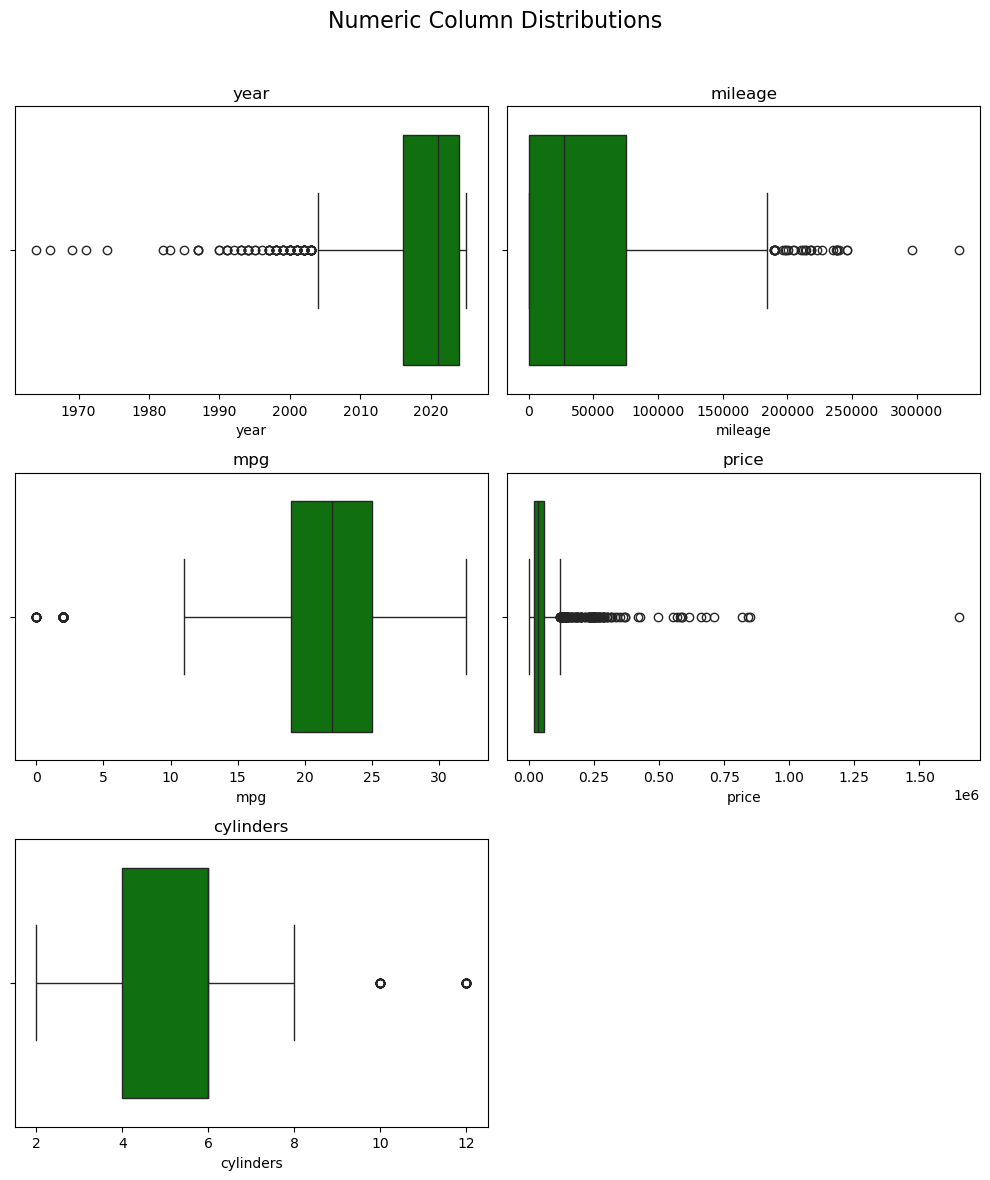

In [112]:
# Filtering numeric columns
num_col = df.select_dtypes(include='number').columns.tolist()

# Exclude the 'zip_code' column if it exists
if 'zip_code' in num_col:
    num_col.remove('zip_code')

# Determine the number of rows needed based on the number of numeric columns and the number of columns per row
num_cols = 2
num_rows = (len(num_col) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each boxplot
for i, col in enumerate(num_col):
    sns.boxplot(data=df, x=col, ax=axes[i], color='green')
    axes[i].set_title(col)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Numeric Column Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

**Insights**

- **Year:** The minimum year is 1964, the median year is 2021 and the maximum year is 2025.
- **Mileage:** The minimum mileage is 0, which makes sense for brand-new vehicles. The median is 24,000 and the maximum is 323, 000.
- **MPG:** The minimum MPG is 0, the median is 22, and the maximum is 32.
- **Price:** The minimum is 0, the median is around \\$37,000 and the maximum is \\$1.6 million.
- **Cylinders:** The minimum is 2, the median is 6 and the maximum is 12.

There appears to be an outlier in MPG showing 0 and the price showing a minimum of $0. The \\$1.6 million is a rare sell of the used Buggati, making this a true outlier that we can leave in our dataset.

Let's see how many rows have 0 pricing in them.

In [113]:
df[df['price'] == 0].shape[0]

8

Since there are only 8, let's drop these rows.

In [114]:
df = df[df['price'] > 0]

In [115]:
print('Minimum Price value', df['price'].min())

Minimum Price value 1750


We succesfully removed the \\$0 price outliers, making the minimum price now \\$1750.

### 3.5 Grouping Models

Next we need to try to group similar models together as best as possible for a better analysis

In [116]:
df['model'].value_counts()

model
EQS 450 Base 4MATIC         47
ProMaster 2500 High Roof    36
ProMaster 2500 Tradesman    35
Transit-350 Base            30
IONIQ 5 SEL                 19
                            ..
Caliber SE                   1
Vue XE                       1
Spark 1LT                    1
Edge Limited                 1
Equinox RS                   1
Name: count, Length: 1299, dtype: int64

In [117]:
df_model_ungrouped = df['model'].value_counts().count()
df_model_ungrouped

1299

We can see some that can be grouped, for example the ProMaster 2500. We will use fuzzing to try to accomplish this.

In [118]:
# Combing matching models

from rapidfuzz import process, fuzz
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def normalize_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    # Join tokens back into a string
    return ' '.join(tokens)

def update_similar_models(df, threshold=80):
    for brand in df['brand'].unique():
        brand_df = df[df['brand'] == brand]
        models = brand_df['model'].tolist()
        
        # Normalize model names
        normalized_models = {model: normalize_text(model) for model in models}
        
        # Create a dictionary to map original models to their representative model
        model_map = {}
        
        for model in models:
            if model not in model_map:
                # Find the best match for the current model
                best_match = process.extractOne(normalized_models[model], normalized_models.values(), scorer=fuzz.token_set_ratio)
                if best_match[1] >= threshold:
                    # Use the original model name with the best match
                    representative_model = model
                    # Update the model_map for all similar models
                    for similar_model in models:
                        if fuzz.token_set_ratio(normalized_models[similar_model], best_match[0]) >= threshold:
                            model_map[similar_model] = representative_model
        
        # Update the DataFrame with the representative models
        df.loc[df['brand'] == brand, 'model'] = df.loc[df['brand'] == brand, 'model'].map(model_map)
    
    return df

# Update the DataFrame
updated_models = update_similar_models(df)

updated_models = pd.DataFrame(updated_models)

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [119]:
df_model_grouped = df['model'].value_counts().count()
print(df_model_ungrouped - df_model_grouped)

593


We were able to sucessfully group these, narrowing our unique models from 1299 to 593 unique brands.

## 4. Exploratory Data Analysis
In this section, we will explore summary statistics and show some descriptive graphs to glean basic insights

### 4.1 Numeric Correlations

Let's take a look at how the numeric columns correlate to each other.

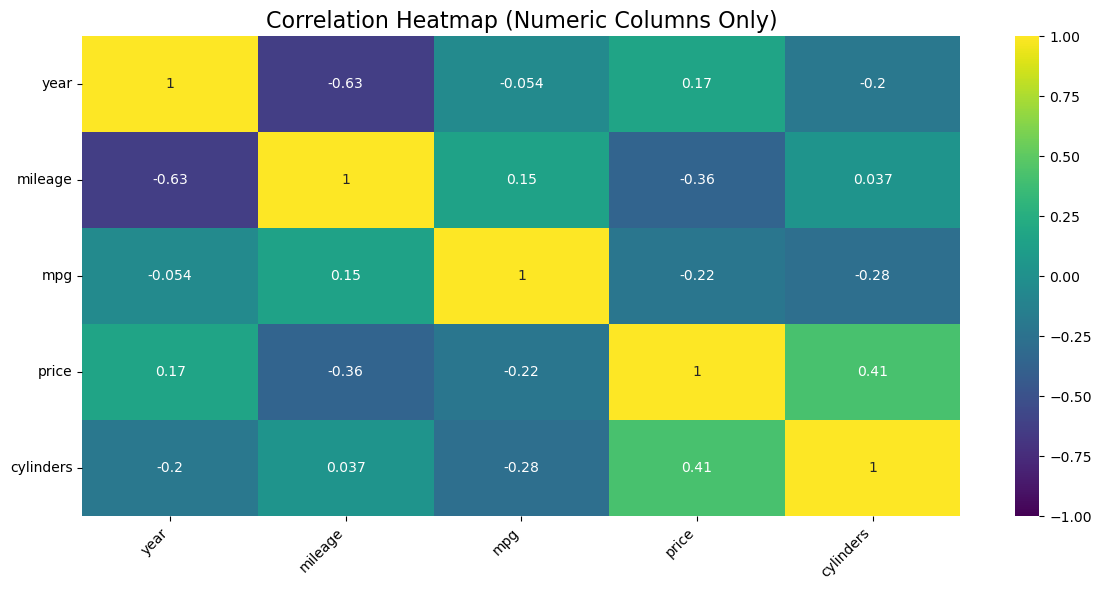

In [120]:
# Filtering numeric columns
num_col = df.select_dtypes(include='number').columns.tolist()

# Exclude the 'zip_code' column if it exists
if 'zip_code' in num_col:
    num_col.remove('zip_code')

# Calculate the correlation matrix using the filtered numeric columns
corr_matrix = df[num_col].corr()

# Create the heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)

# Add title and adjust layout
plt.title('Correlation Heatmap (Numeric Columns Only)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

**Insights**

- **Year and Mileage (-0.63):** This shows a strong negative correlation between the year of the vehicle and it's mileage. This suggests that newer vehicles tend to have lowe rmileage, which is intuitive as newer cars have been driven less.
- **Year and Price (0.17):** There is a weak positive correlation between the year of the vehicle and its price. This suggests that newer vehicles tend to be more expensive, which makes sense as newer models generally have higher prices.

- **Mileage and Price (-0.36):** There is a moderate negative correlation between mileage and price. This indicates that vehicles with higher mileage tend to be less expensive, which aligns with the idea that more used (higher mileage) vehicles are cheaper.

- **MPG and Price (-0.22):** There is a weak negative correlation between miles per gallon (mpg) and price. This suggests that vehicles with better fuel efficiency (higher mpg) tend to be less expensive, which might indicate that luxury vehicles (which tend to be more expensive) are less fuel-efficient.

- **Cylinders and Price (0.41):** There is a moderate positive correlation between the number of cylinders in the vehicle's engine and its price. This suggests that vehicles with more powerful engines (more cylinders) are generally more expensive.

- **Cylinders and MPG (-0.28):** There is a weak to moderate negative correlation between the number of cylinders and miles per gallon. This suggests that vehicles with more cylinders (more powerful engines) are less fuel-efficient.

**Overall Summary:**

- Newer vehicles are less driven and more expensive.
- Higher mileage vehicles tend to be cheaper.
- More fuel-efficient vehicles (higher mpg) tend to be less expensive.
- More powerful engines (more cylinders) correlate with higher prices and lower fuel efficiency.


### 4.2 Most Listed Analysis

In this section we will dive into the most listed options, such as brand, model, and transmission.

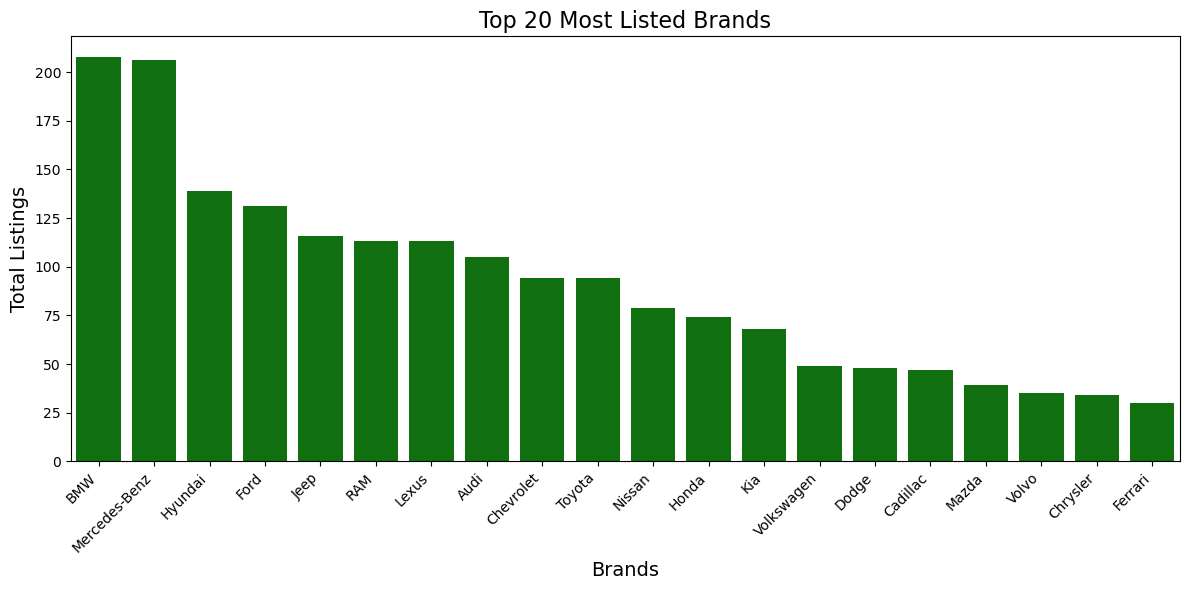

In [121]:

# Group by 'brand' and count occurrences
popular_brand = df.groupby('brand').size().reset_index(name='count')

# Sort by 'count' in descending order (if not already sorted)
popular_brand = popular_brand.sort_values(by='count', ascending=False)
popular_brand = popular_brand.head(20)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=popular_brand, x='brand', y='count', color='green')

# Add title and labels
plt.title('Top 20 Most Listed Brands', fontsize=16)
plt.xlabel('Brands', fontsize=14)
plt.ylabel('Total Listings', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Overall, we can see the top 20 most listed brands. BMW and Mercedes-Benz are by far the most popular with around 200 listed. Hyundai follows at only 139 listed, about a 40% difference.

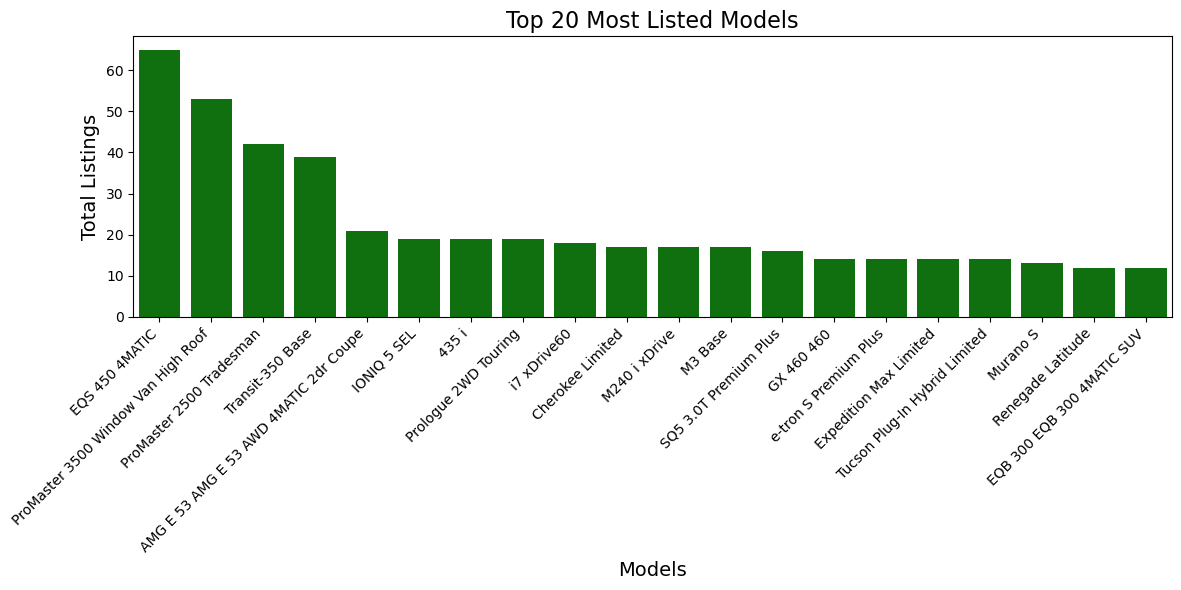

In [122]:
# Group by 'model' and count occurrences
popular_model = updated_models.groupby('model').size().reset_index(name='count')

# Sort by 'count' in descending order (if not already sorted)
popular_model = popular_model.sort_values(by='count', ascending=False)
popular_model = popular_model.head(20)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=popular_model, x='model', y='count', color='green')

# Add title and labels
plt.title('Top 20 Most Listed Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Total Listings', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

This plot shows the top 20 most listed models. We can observe that even though BMW is the most popular brand listed, the most popular model is the Mercedes-Benz EQS 450 at 65 listings. The ProMaster 3500 follows closely at 53 listings.

It’s interesting to see that after the Mercedes-Benz EQS 450, big commercial vans seem to be the most popular until the Mercedes-AMG E 53 comes in with 21 listings.

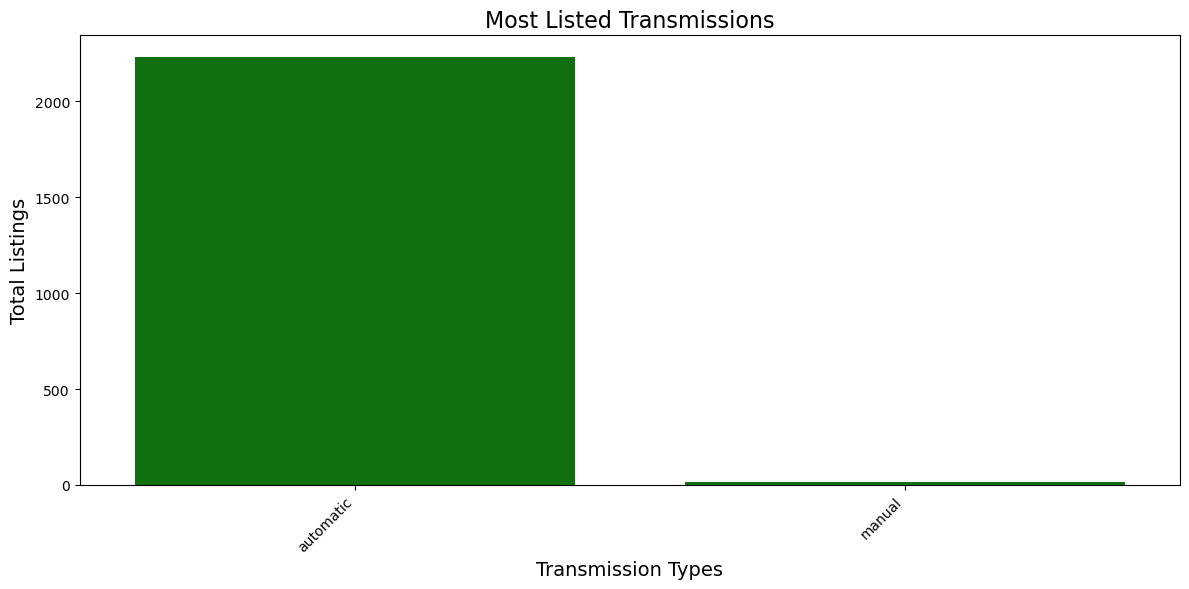

In [123]:
# Group by 'transmission' and count occurrences
popular_transmission = updated_models.groupby('transmission').size().reset_index(name='count')

# Sort by 'count' in descending order and select top 20
popular_transmission = popular_transmission.sort_values(by='count', ascending=False).head(20)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=popular_transmission, x='transmission', y='count', color='green')

# Add title and labels
plt.title('Most Listed Transmissions', fontsize=16)
plt.xlabel('Transmission Types', fontsize=14)
plt.ylabel('Total Listings', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

We can observe that automatic transmissions are listed far more than manual transmissions.

## 4.3 Luxury vs Non-Luxury Analysis

Let's set up our new and used luxury and non-luxury filters.

In [124]:
# Define new/used lux/non-lux
new_lux = df[(df['category'] == 'Luxury') & (df['status'] == 'New')]
used_lux = df[(df['category'] == 'Luxury') & (df['status'] == 'Used')]

new_nonlux = df[(df['category'] != 'Luxury') & (df['status'] == 'New')]
used_nonlux = df[(df['category'] != 'Luxury') & (df['status'] == 'Used')]

We will look at the top 10 new and used averaeg pricing for both luxury and non-luxury brands.

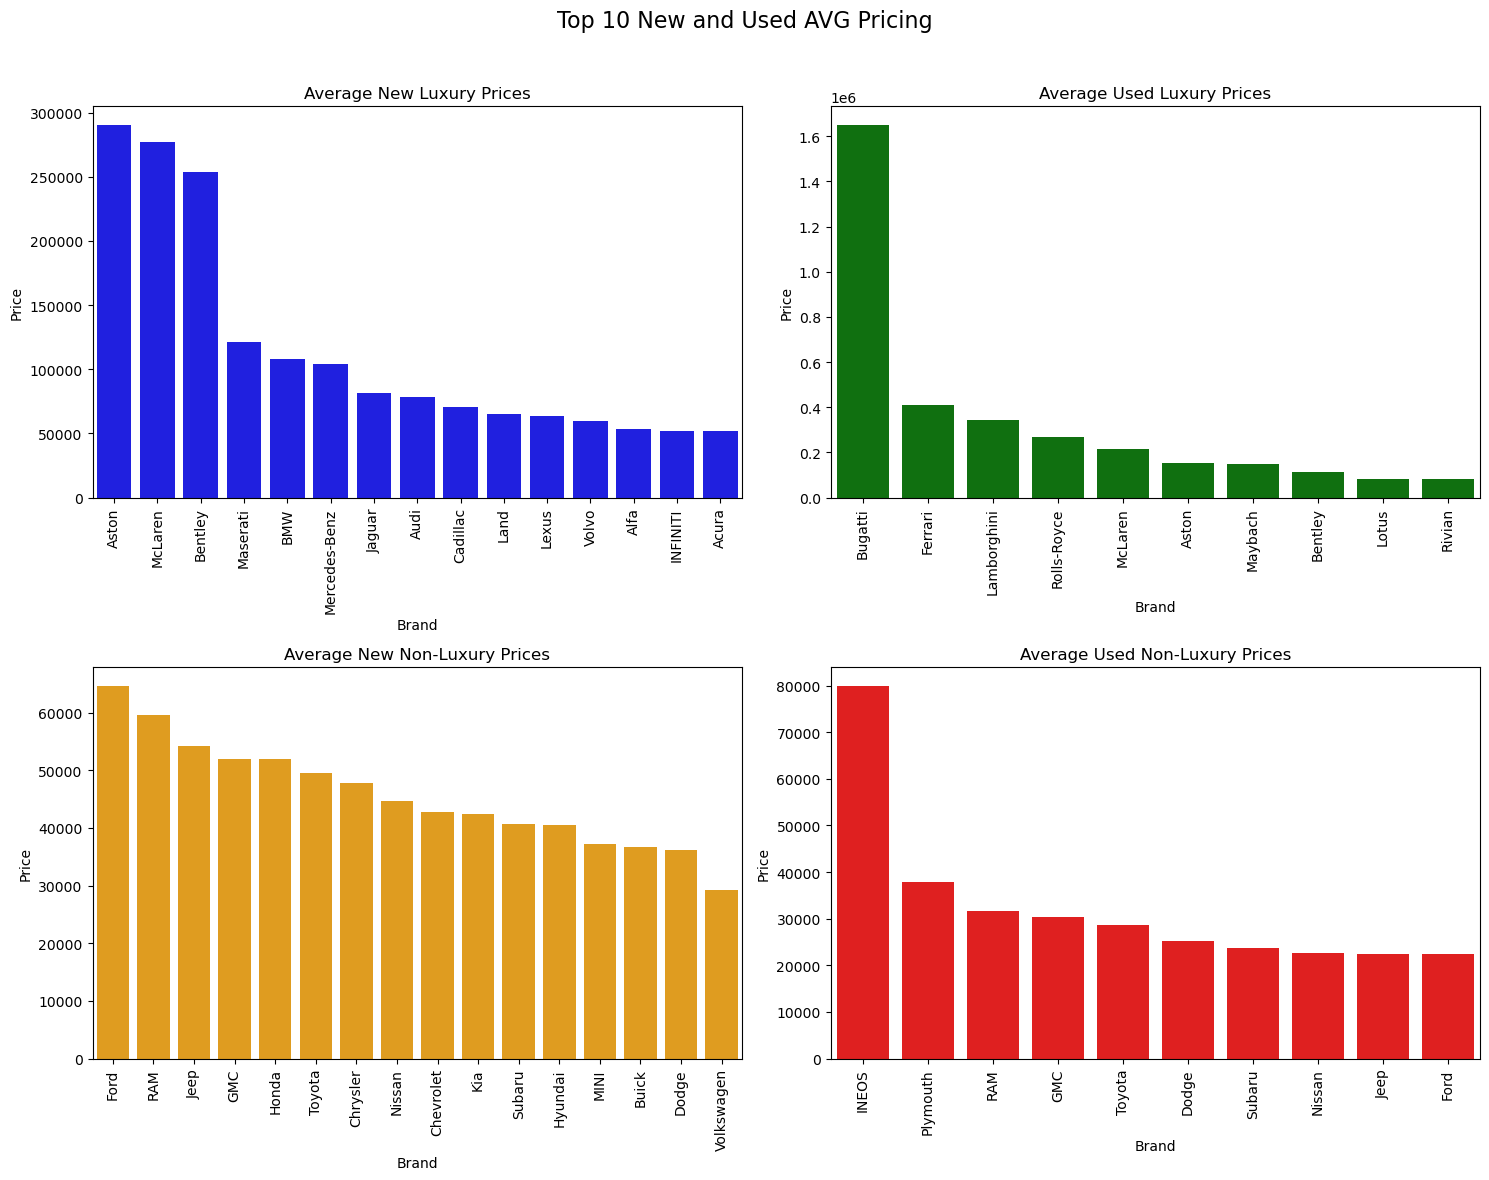

In [125]:
# Define data
avg_newlux_price = new_lux.groupby('brand')['price'].agg('mean').astype(int).sort_values(ascending=False).head(40)
avg_usedlux_price = used_lux.groupby('brand')['price'].agg('mean').astype(int).sort_values(ascending=False).head(10)
avg_newnonlux_price = new_nonlux.groupby('brand')['price'].agg('mean').astype(int).sort_values(ascending=False).head(40)
avg_usednonlux_price = used_nonlux.groupby('brand')['price'].agg('mean').astype(int).sort_values(ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Top 10 New and Used AVG Pricing", fontsize=16)

# Plot each subplot
sns.barplot(x=avg_newlux_price.index, y=avg_newlux_price.values, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Average New Luxury Prices")
axes[0, 0].set_xlabel("Brand")
axes[0, 0].set_ylabel("Price")
axes[0, 0].tick_params(axis='x', rotation=90)

sns.barplot(x=avg_usedlux_price.index, y=avg_usedlux_price.values, ax=axes[0, 1], color='green')
axes[0, 1].set_title("Average Used Luxury Prices")
axes[0, 1].set_xlabel("Brand")
axes[0, 1].set_ylabel("Price")
axes[0, 1].tick_params(axis='x', rotation=90)

sns.barplot(x=avg_newnonlux_price.index, y=avg_newnonlux_price.values, ax=axes[1, 0], color='orange')
axes[1, 0].set_title("Average New Non-Luxury Prices")
axes[1, 0].set_xlabel("Brand")
axes[1, 0].set_ylabel("Price")
axes[1, 0].tick_params(axis='x', rotation=90)

sns.barplot(x=avg_usednonlux_price.index, y=avg_usednonlux_price.values, ax=axes[1, 1], color='red')
axes[1, 1].set_title("Average Used Non-Luxury Prices")
axes[1, 1].set_xlabel("Brand")
axes[1, 1].set_ylabel("Price")
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- **Average New Luxury Prices:** Aston has the highest average price, and Acura has the lowest.

- **Average Used Luxury Prices:** Bugatti has the highest average price, and Rivian has the lowest.

- **Average New Non-Luxury Prices:** Ford has the highest average price, and Volkswagen has the lowest.

- **Average Used Non-Luxury Prices:** INEOS has the highest average price, and Ford has the lowest.



Now we're going to look at the distribution of luxury and non-luxry MPG for each brand.

In [126]:
# # Convert mileage to numeric type (integer or float)
# mileage_df['mileage'] = pd.to_numeric(mileage_df['mileage'], errors='coerce')

# # Group by category, status, and brand to calculate average mileage
# avg_mileage = mileage_df.groupby(['category', 'status', 'brand'])['mileage'].mean().reset_index()

# # Convert mileage to integer
# avg_mileage['mileage'] = avg_mileage['mileage'].astype(int)

# # Filter and sort the data using .loc
# new_avg_mileage = avg_mileage.loc[avg_mileage['status'] == 'New'].sort_values('mileage', ascending=False)
# used_avg_mileage = avg_mileage.loc[avg_mileage['status'] == 'Used'].sort_values('mileage', ascending=False)

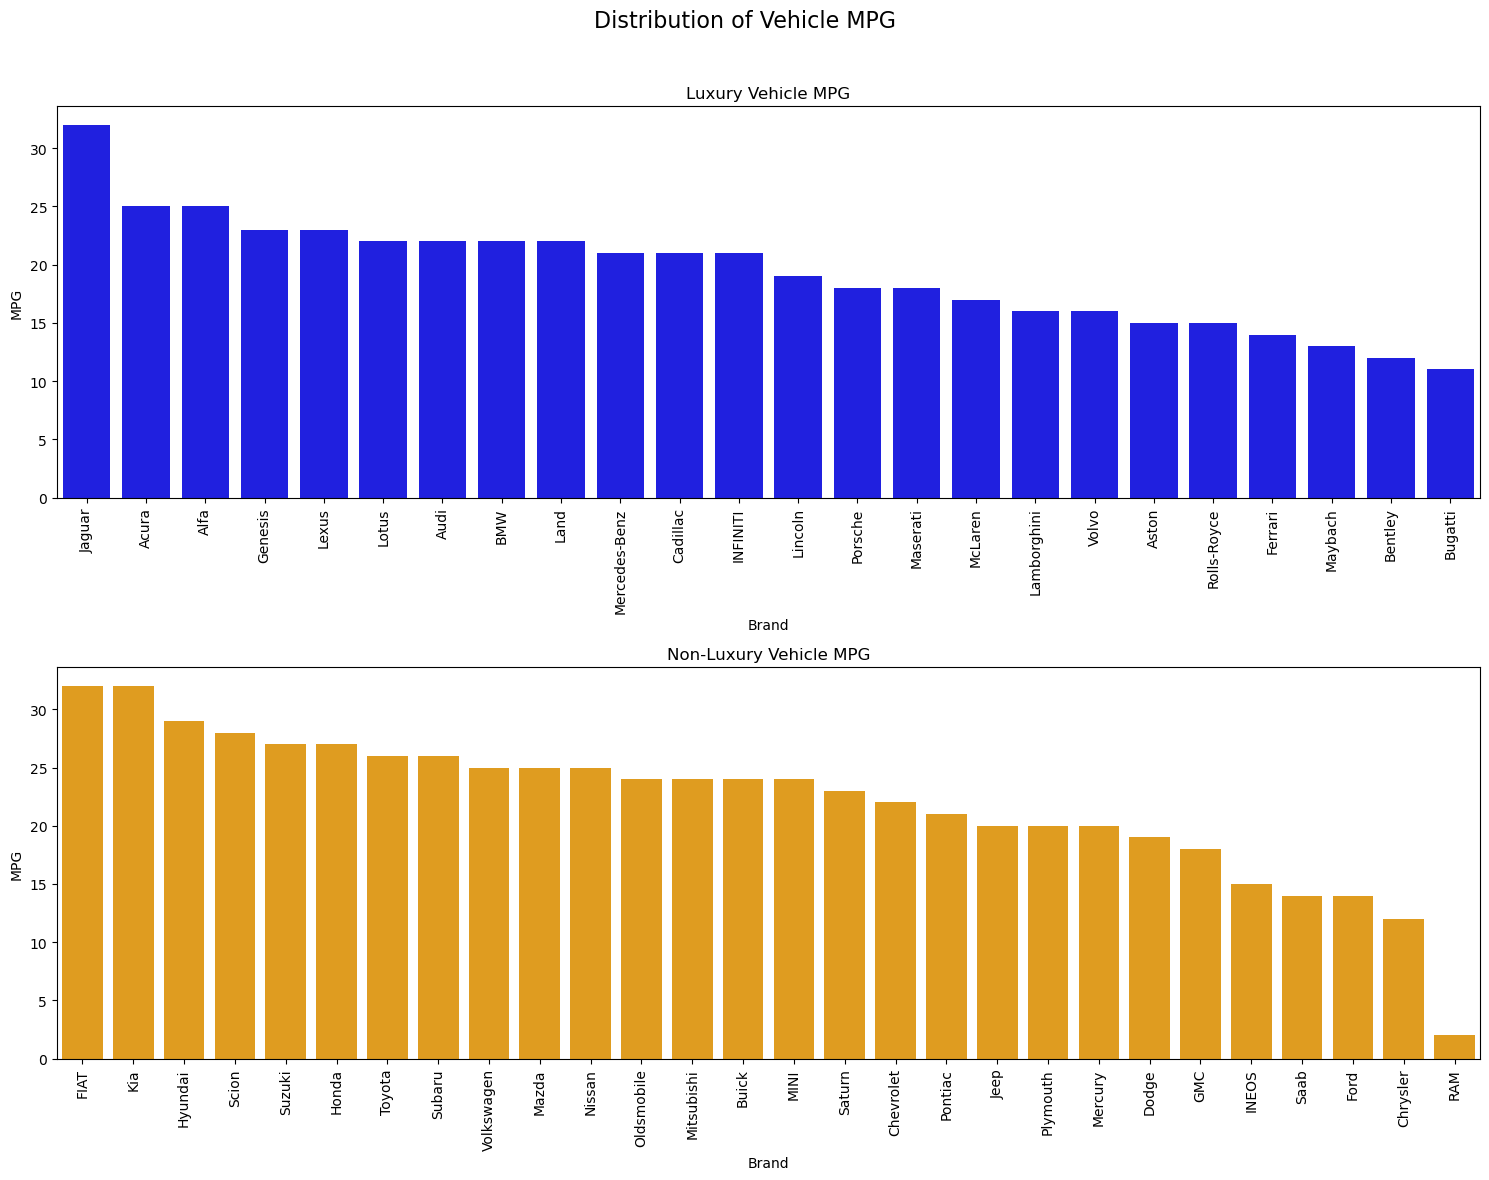

In [131]:
# Group by category and brand to calculate average mpg
avg_mpg = df.groupby(['category', 'brand'])['mpg'].mean().reset_index()

# Convert mpg to integer (optional)
avg_mpg['mpg'] = avg_mpg['mpg'].astype('Int64')  # Use 'Int64' to handle NA values

# Remove rows where 'mpg' is null or zero
avg_mpg = avg_mpg[~avg_mpg['mpg'].isna() & (avg_mpg['mpg'] != 0)]

# Filter and sort the data using .loc
lux_avg_mpg = avg_mpg.loc[avg_mpg['category'] == 'Luxury'].sort_values('mpg', ascending=False)
nonlux_avg_mpg = avg_mpg.loc[avg_mpg['category'] != 'Luxury'].sort_values('mpg', ascending=False)

# Create subplots: 2 rows, 1 column
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Distribution of Vehicle MPG', fontsize=16)

# Plot for Luxury MPG Cars
sns.barplot(x=lux_avg_mpg['brand'], y=lux_avg_mpg['mpg'], ax=axes[0], color='blue')
axes[0].set_title('Luxury Vehicle MPG')
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('MPG')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Non-Luxury MPG Cars
sns.barplot(x=nonlux_avg_mpg['brand'], y=nonlux_avg_mpg['mpg'], ax=axes[1], color='orange')
axes[1].set_title('Non-Luxury Vehicle MPG')
axes[1].set_xlabel('Brand')
axes[1].set_ylabel('MPG')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- **Luxury Vehicle MPG:** Jaguar has the highest MPG at 32, and Bugatti has the lowest MPG at 11.

- **Non-Luxury Vehicle MPG:** FIAT and Hyundai have the highest MPG at 32, and RAM has the lowest MPG at 2.

Next, we're going to look at the most popular listed fuel types for luxury and non-luxury vehicles

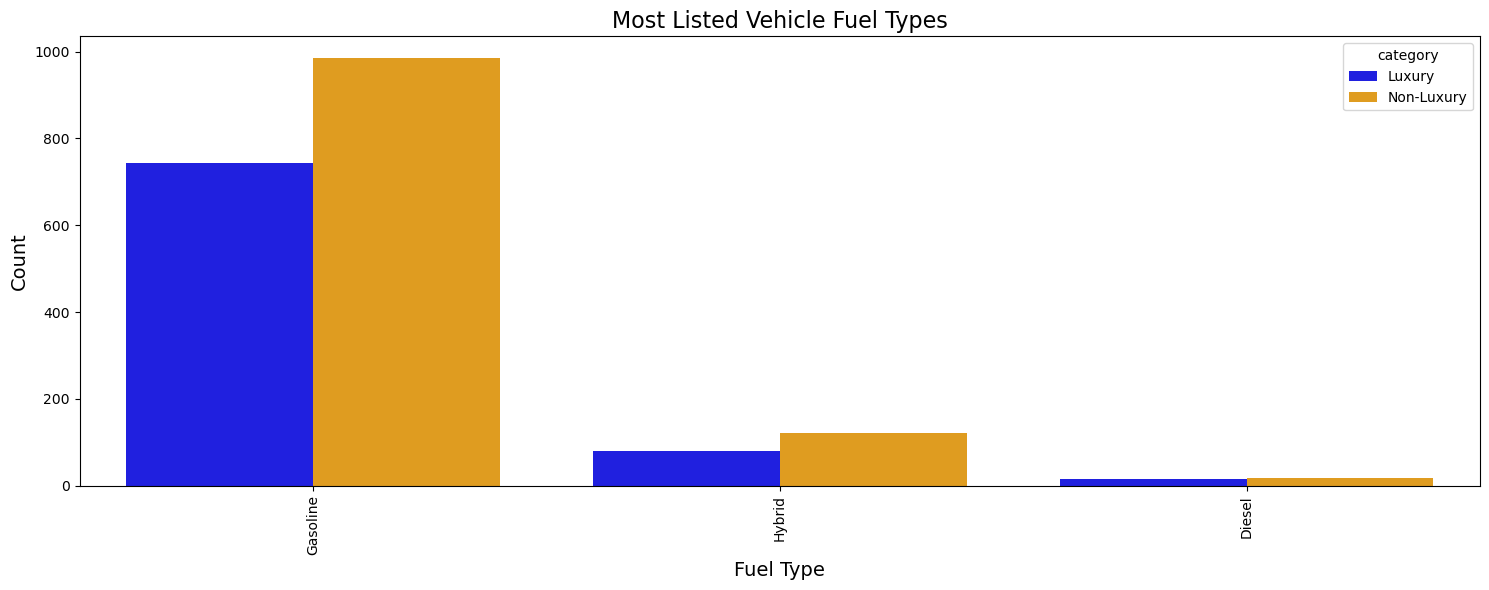

In [133]:
# Filter out data
luxury_fuel_types = df[(df['fuel_type'] != 'Unknown') & (df['category'] == 'Luxury') & (df['fuel_type'] != 'nan')]
nonluxury_fuel_types = df[(df['fuel_type'] != 'Unknown') & (df['category'] == 'Non-Luxury') & (df['fuel_type'] != 'nan')]

# Group by fuel_type and category
luxury_fuel_types_counts = luxury_fuel_types.groupby(['fuel_type', 'category']).size().reset_index(name='count')
luxury_fuel_types_counts = luxury_fuel_types_counts.sort_values(by='count', ascending=False).head(100)

nonluxury_fuel_types_counts = nonluxury_fuel_types.groupby(['fuel_type', 'category']).size().reset_index(name='count')
nonluxury_fuel_types_counts = nonluxury_fuel_types_counts.sort_values(by='count', ascending=False).head(100)

# Combine data for plotting
combined_counts = pd.concat([luxury_fuel_types_counts, nonluxury_fuel_types_counts])

# Plotting with Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(data=combined_counts, x='fuel_type', y='count', hue='category', palette=['blue', 'orange'])

# Add title and labels
plt.title('Most Listed Vehicle Fuel Types', fontsize=16)
plt.xlabel('Fuel Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Adjust layout for better visibility
plt.tight_layout()

# Show the plot
plt.show()

- **Gasoline:** The most listed fuel type for both luxury and non-luxury. Luxury fuel types are listed as 743 and non-luxury are listed as 986.
- **Hybrid:** Luxury hybrids have 79 fuel types listed, where non-luxury are 121.
- **Diesel:** Luxury and non-luxury diesel options are closely matched, with luxury fuel types having 16 listings and non-luxury having 18.

Now let's take a look at the most listed transmissions.

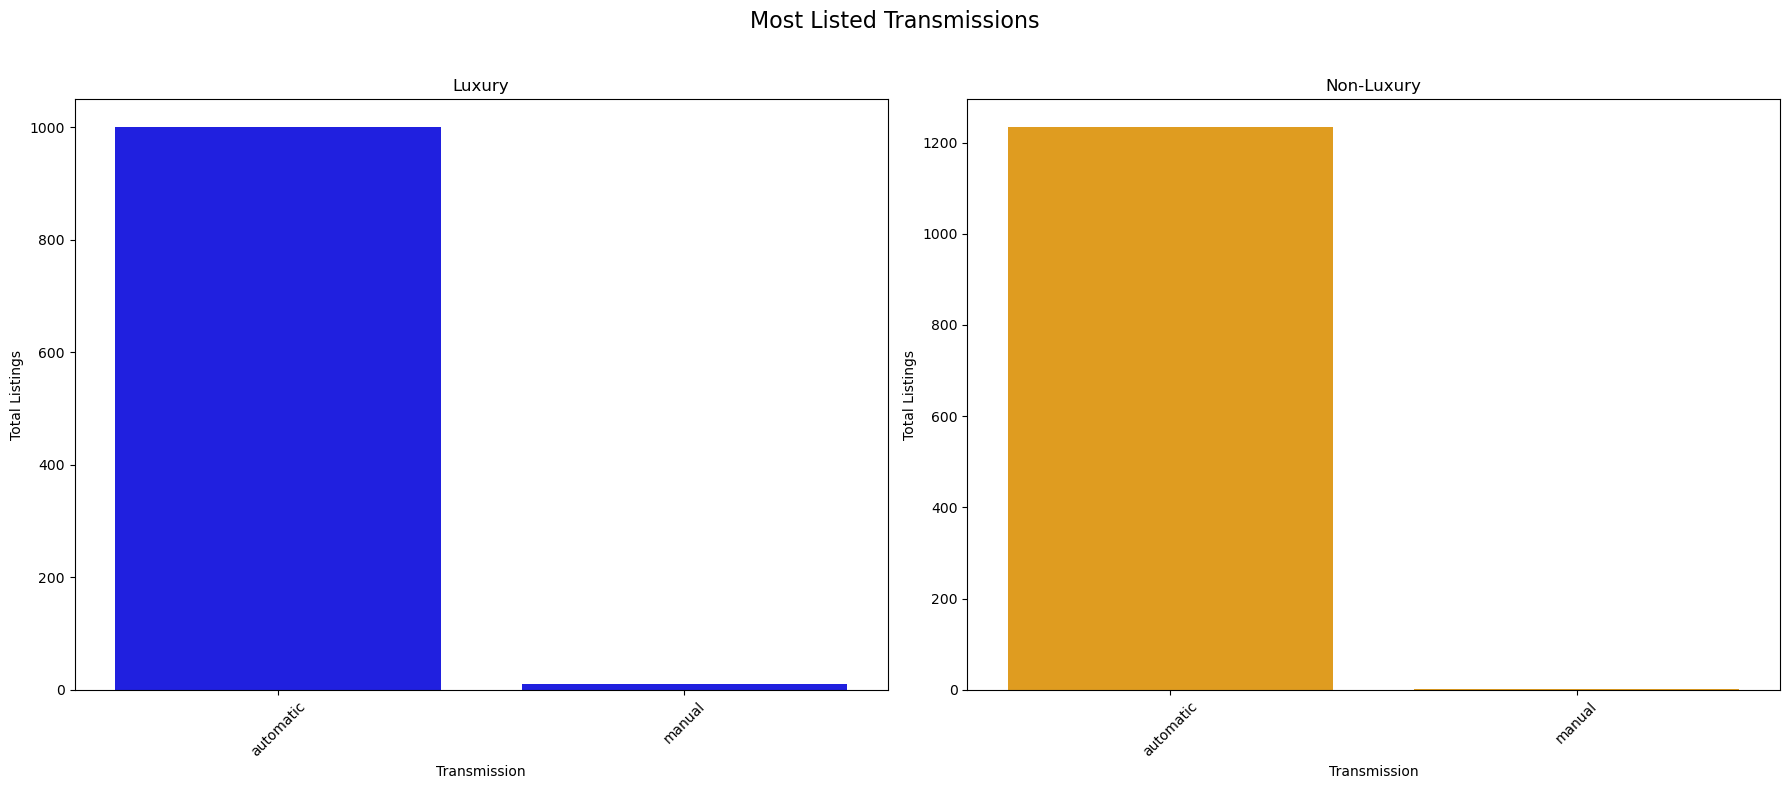

In [134]:
# Filter data for each category
luxury_transmission = updated_models[updated_models['category'] == 'Luxury']
nonluxury_transmission = updated_models[updated_models['category'] == 'Non-Luxury']

# Group by 'transmission' and count occurrences for each category
luxury_transmission_counts = luxury_transmission.groupby('transmission').size().reset_index(name='count')
nonluxury_transmission_counts = nonluxury_transmission.groupby('transmission').size().reset_index(name='count')

# Sort by 'count' in descending order and select top 20 for each category
luxury_transmission_counts = luxury_transmission_counts.sort_values(by='count', ascending=False).head(20)
nonluxury_transmission_counts = nonluxury_transmission_counts.sort_values(by='count', ascending=False).head(20)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Most Listed Transmissions', fontsize=16)

# Plot for Luxury transmissions
sns.barplot(x=luxury_transmission_counts['transmission'], y=luxury_transmission_counts['count'], ax=axes[0], color='blue')
axes[0].set_title('Luxury')
axes[0].set_xlabel('Transmission')
axes[0].set_ylabel('Total Listings')
axes[0].tick_params(axis='x', rotation=45)

# Plot for Non-Luxury transmissions
sns.barplot(x=nonluxury_transmission_counts['transmission'], y=nonluxury_transmission_counts['count'], ax=axes[1], color='orange')
axes[1].set_title('Non-Luxury')
axes[1].set_xlabel('Transmission')
axes[1].set_ylabel('Total Listings')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

- **Automatic:** Luxury has 1000 automatic transmissions listed and 1233 non-luxury automatic listings.
- **Manual:** Luxury has 10 manual transmissions listed with only 3 non-luxury listed.

From here let's look at who the top sellers of luxury and non-luxury brands are.

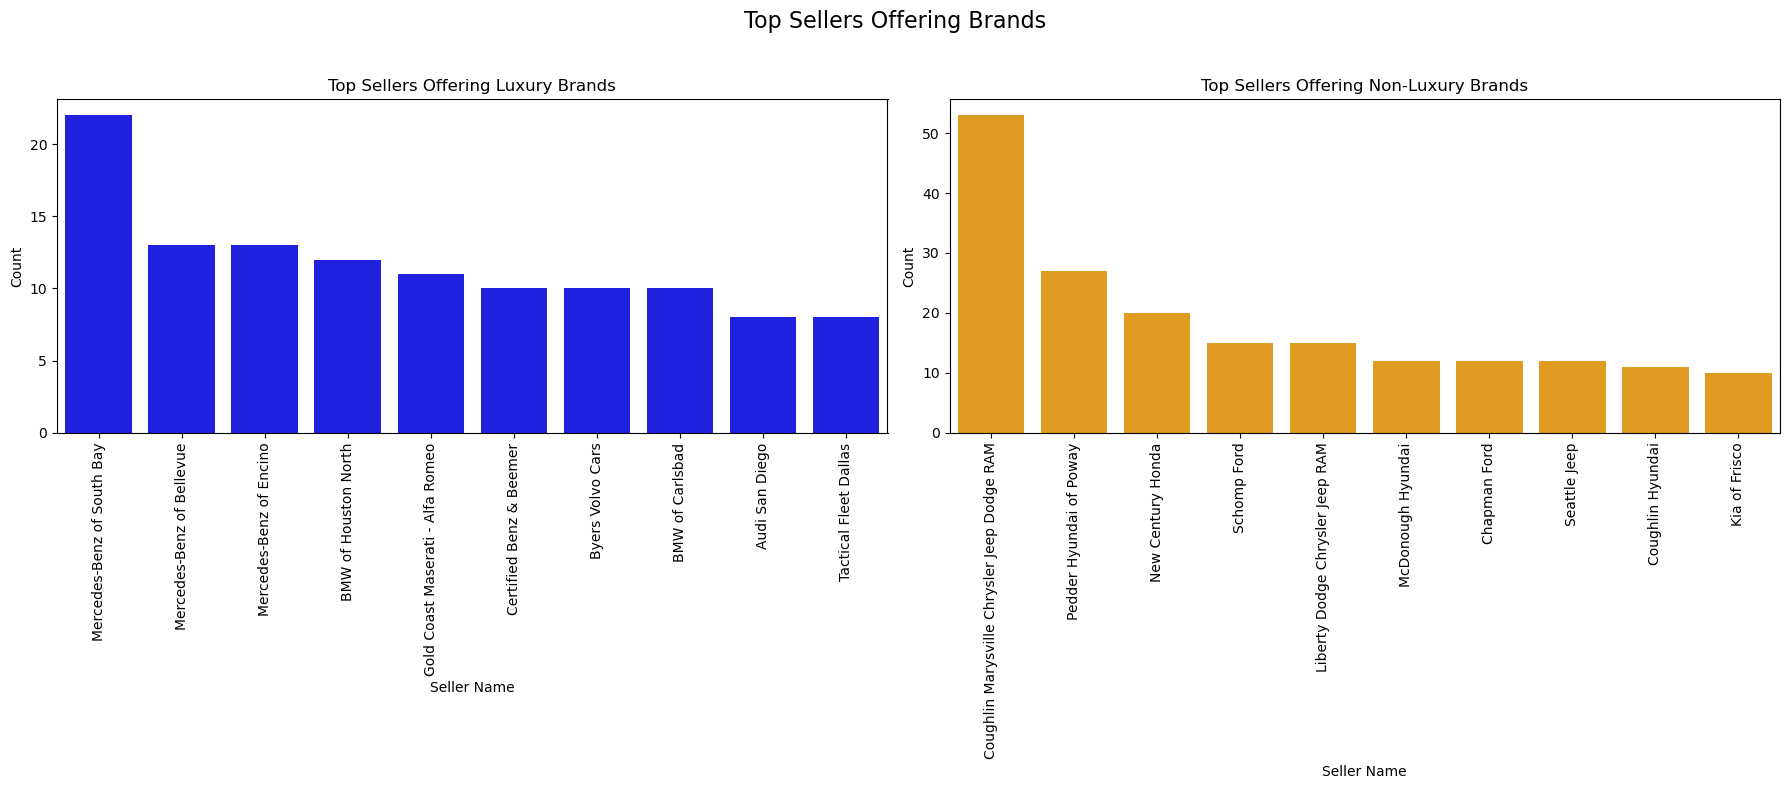

In [135]:
# Count number of models offered by each seller_name, grouped by category
luxury_seller_brand_counts = df[df['category'] == 'Luxury'].groupby(['seller_name', 'category'])['brand'].count().reset_index()
luxury_seller_brand_counts = luxury_seller_brand_counts.sort_values(by='brand', ascending=False).head(10)

nonluxury_seller_brand_counts = df[df['category'] == 'Non-Luxury'].groupby(['seller_name', 'category'])['brand'].count().reset_index()
nonluxury_seller_brand_counts = nonluxury_seller_brand_counts.sort_values(by='brand', ascending=False).head(10)

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Top Sellers Offering Brands', fontsize=16)

# Plot for Top Sellers Offering Luxury Brands
sns.barplot(x=luxury_seller_brand_counts['seller_name'], y=luxury_seller_brand_counts['brand'], ax=axes[0], color='blue')
axes[0].set_title('Top Sellers Offering Luxury Brands')
axes[0].set_xlabel('Seller Name')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Top Sellers Offering Non-Luxury Brands
sns.barplot(x=nonluxury_seller_brand_counts['seller_name'], y=nonluxury_seller_brand_counts['brand'], ax=axes[1], color='orange')
axes[1].set_title('Top Sellers Offering Non-Luxury Brands')
axes[1].set_xlabel('Seller Name')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

- **Luxury:** Mercedes-Benz of South Bay has the highest listing of different brands, listing 22. The lowest is Gold Coast Maserati - Alfa Romeo listing 11.
- **Non-Luxury:** Coughlin Marysville Chrysler Jeep Dodge RAM lists the most brands at 53. Liberty Dodge Chrysler Jeep RAM lists the lowest amount at 15.

## 4.4 Geography Analysis

In this section we will conduct an analysis, segmenting luxury and non-luxury by city.

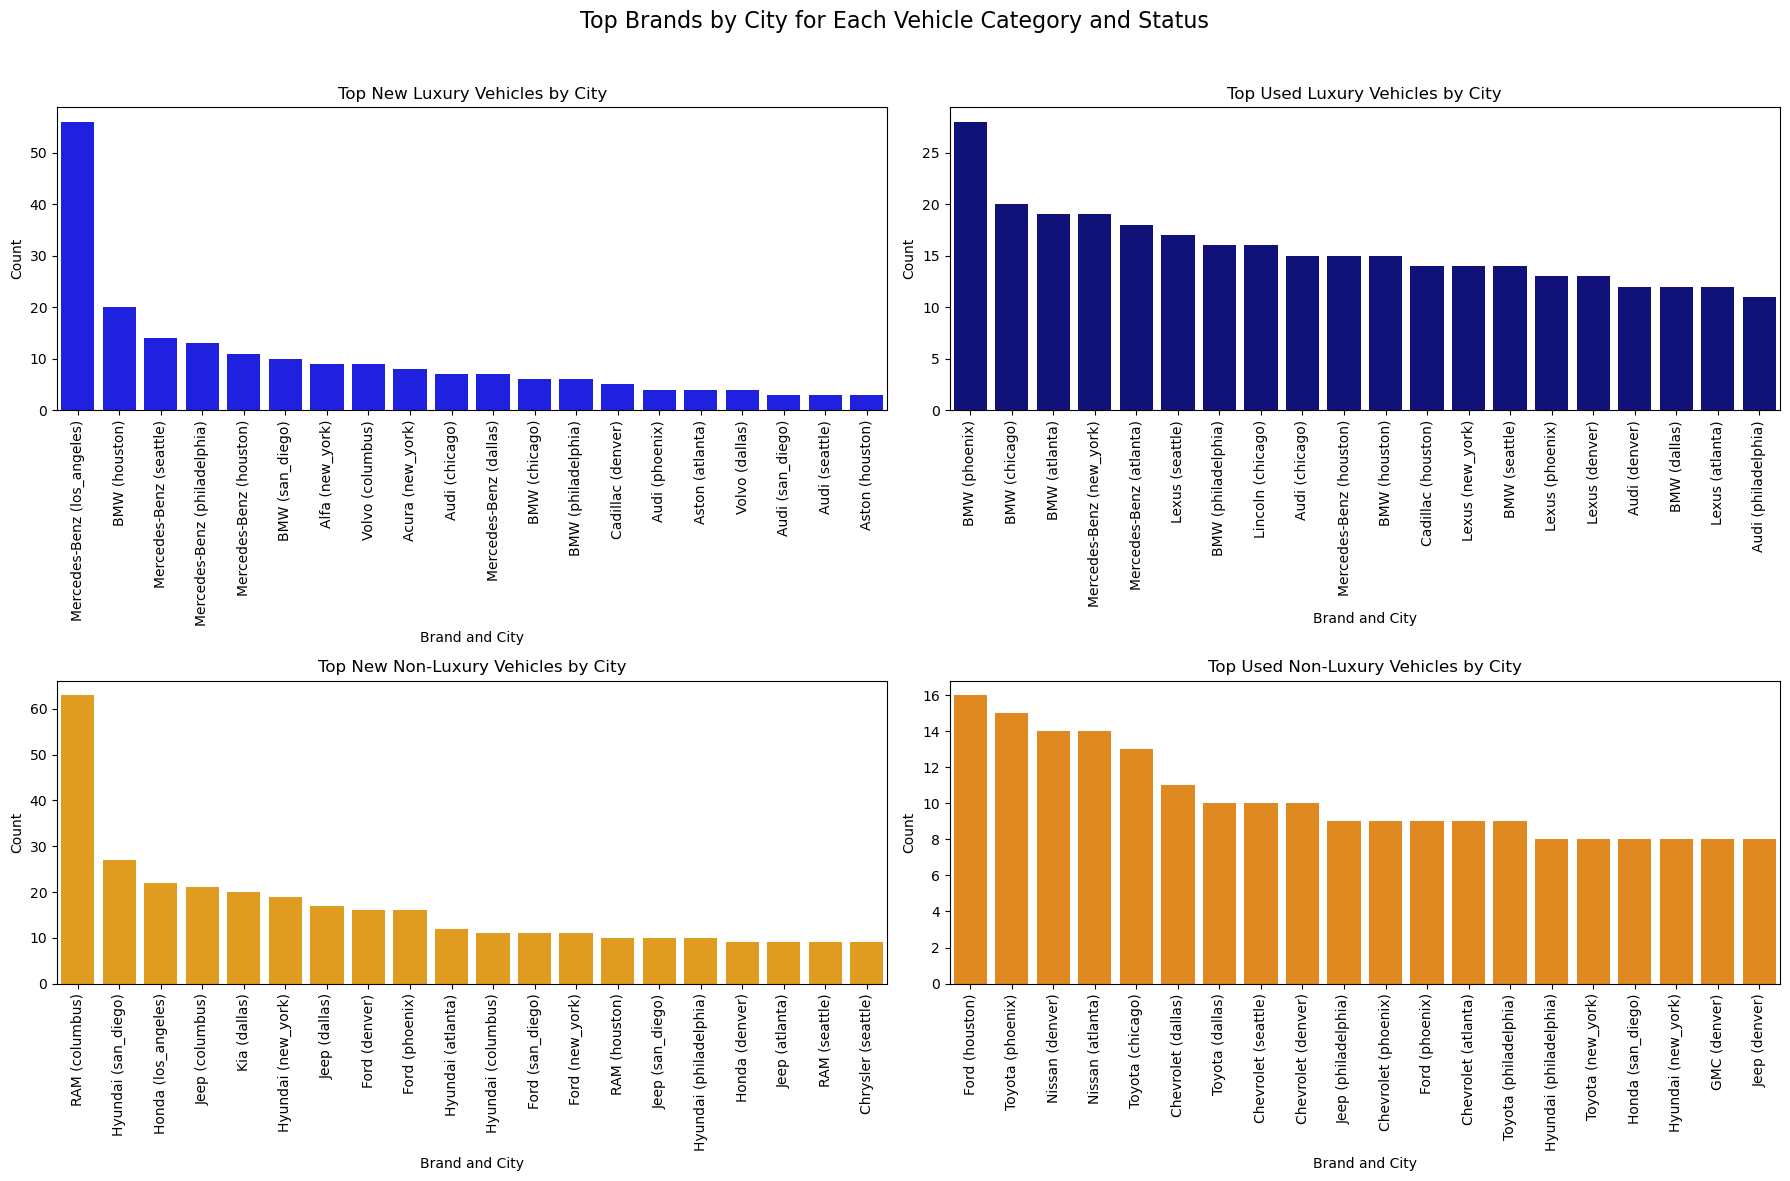

In [139]:
# Calculate count of each brand per city for Luxury Vehicles - New
luxury_brands_by_city_new = df[(df['category'] == 'Luxury') & (df['status'] == 'New')].groupby(['city', 'brand']).size().reset_index(name='count')
luxury_brands_by_city_new = luxury_brands_by_city_new.sort_values(by='count', ascending=False).head(20)

# Calculate count of each brand per city for Luxury Vehicles - Used
luxury_brands_by_city_used = df[(df['category'] == 'Luxury') & (df['status'] == 'Used')].groupby(['city', 'brand']).size().reset_index(name='count')
luxury_brands_by_city_used = luxury_brands_by_city_used.sort_values(by='count', ascending=False).head(20)

# Calculate count of each brand per city for Non-Luxury Vehicles - New
nonluxury_brands_by_city_new = df[(df['category'] == 'Non-Luxury') & (df['status'] == 'New')].groupby(['city', 'brand']).size().reset_index(name='count')
nonluxury_brands_by_city_new = nonluxury_brands_by_city_new.sort_values(by='count', ascending=False).head(20)

# Calculate count of each brand per city for Non-Luxury Vehicles - Used
nonluxury_brands_by_city_used = df[(df['category'] == 'Non-Luxury') & (df['status'] == 'Used')].groupby(['city', 'brand']).size().reset_index(name='count')
nonluxury_brands_by_city_used = nonluxury_brands_by_city_used.sort_values(by='count', ascending=False).head(20)

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Top Brands by City for Each Vehicle Category and Status', fontsize=16)

# Plot top brands per city for Luxury Vehicles - New
sns.barplot(x=luxury_brands_by_city_new['brand'] + ' (' + luxury_brands_by_city_new['city'] + ')', 
            y=luxury_brands_by_city_new['count'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Top New Luxury Vehicles by City')
axes[0, 0].set_xlabel('Brand and City')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot top brands per city for Luxury Vehicles - Used
sns.barplot(x=luxury_brands_by_city_used['brand'] + ' (' + luxury_brands_by_city_used['city'] + ')', 
            y=luxury_brands_by_city_used['count'], ax=axes[0, 1], color='darkblue')
axes[0, 1].set_title('Top Used Luxury Vehicles by City')
axes[0, 1].set_xlabel('Brand and City')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot top brands per city for Non-Luxury Vehicles - New
sns.barplot(x=nonluxury_brands_by_city_new['brand'] + ' (' + nonluxury_brands_by_city_new['city'] + ')', 
            y=nonluxury_brands_by_city_new['count'], ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Top New Non-Luxury Vehicles by City')
axes[1, 0].set_xlabel('Brand and City')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot top brands per city for Non-Luxury Vehicles - Used
sns.barplot(x=nonluxury_brands_by_city_used['brand'] + ' (' + nonluxury_brands_by_city_used['city'] + ')', 
            y=nonluxury_brands_by_city_used['count'], ax=axes[1, 1], color='darkorange')
axes[1, 1].set_title('Top Used Non-Luxury Vehicles by City')
axes[1, 1].set_xlabel('Brand and City')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

**Top New Luxury Vehicles by City**
- **Mercedes-Benz (Los Angeles):** 56 cars
- **BMW (New York):** 20 cars
- **Mercedes-Benz (Chicago):** 14 cars
- **BMW (San Francisco):** 13 cars
- Other brands and cities have fewer cars, with counts ranging from 10 to 3.

**Top Used Luxury Vehicles by City**
- **BMW (Phoenix):** 28 cars
- **BMW (Houston):** 20 cars
- **BMW (Chicago):** 19 cars
- **BMW (New York):** 18 cars
- Other brands and cities have counts ranging from 17 to 11.

**Top New Non-Luxury Vehicles by City**
- **RAM (Columbus):** 63 cars
- **Hyundai (Phoenix):** 27 cars
- **Honda (Columbus):** 22 cars
- **Hyundai (Dallas):** 21 cars
- Other brands and cities have counts ranging from 20 to 9.

**Top Used Non-Luxury Vehicles by City**
- **Ford (Houston):** 16 cars
- **Toyota (Phoenix):** 15 cars
- **Nissan (Chicago):** 14 cars
- **Toyota (Dallas):** 14 cars
- Other brands and cities have counts ranging from 13 to 8.


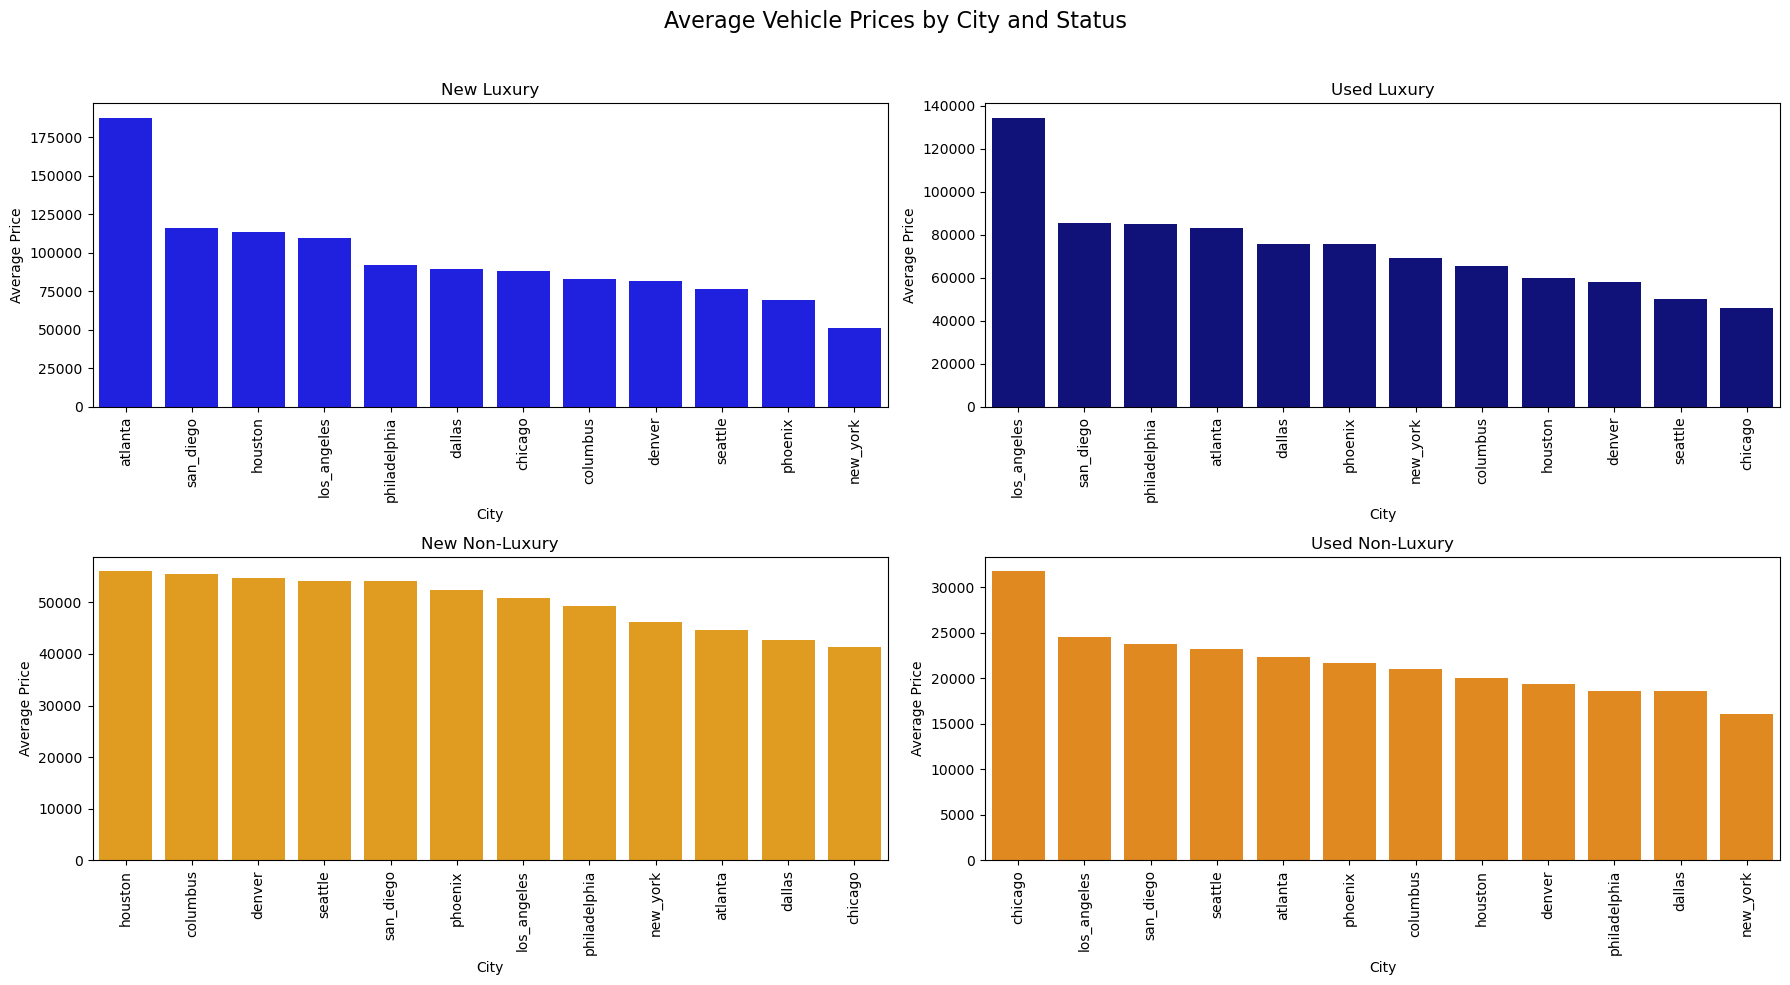

In [141]:
# Calculate average price per city and state for Luxury category with status New
avg_price_per_city_state_luxury_new = df[(df['category'] == 'Luxury') & (df['status'] == 'New')].groupby(['city', 'state'])['price'].mean().reset_index()
avg_price_per_city_state_luxury_new = avg_price_per_city_state_luxury_new.sort_values(by='price', ascending=False)
avg_price_per_city_state_luxury_new['price'] = avg_price_per_city_state_luxury_new['price'].astype(int)

# Calculate average price per city and state for Luxury category with status Used
avg_price_per_city_state_luxury_used = df[(df['category'] == 'Luxury') & (df['status'] == 'Used')].groupby(['city', 'state'])['price'].mean().reset_index()
avg_price_per_city_state_luxury_used = avg_price_per_city_state_luxury_used.sort_values(by='price', ascending=False)
avg_price_per_city_state_luxury_used['price'] = avg_price_per_city_state_luxury_used['price'].astype(int)

# Calculate average price per city and state for Non-Luxury category with status New
avg_price_per_city_state_nonluxury_new = df[(df['category'] == 'Non-Luxury') & (df['status'] == 'New')].groupby(['city', 'state'])['price'].mean().reset_index()
avg_price_per_city_state_nonluxury_new = avg_price_per_city_state_nonluxury_new.sort_values(by='price', ascending=False)
avg_price_per_city_state_nonluxury_new['price'] = avg_price_per_city_state_nonluxury_new['price'].astype(int)

# Calculate average price per city and state for Non-Luxury category with status Used
avg_price_per_city_state_nonluxury_used = df[(df['category'] == 'Non-Luxury') & (df['status'] == 'Used')].groupby(['city', 'state'])['price'].mean().reset_index()
avg_price_per_city_state_nonluxury_used = avg_price_per_city_state_nonluxury_used.sort_values(by='price', ascending=False)
avg_price_per_city_state_nonluxury_used['price'] = avg_price_per_city_state_nonluxury_used['price'].astype(int)

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Average Vehicle Prices by City and Status', fontsize=16)

# Plot average price per city and state for Luxury Vehicles - New
sns.barplot(x=avg_price_per_city_state_luxury_new['city'], y=avg_price_per_city_state_luxury_new['price'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('New Luxury')
axes[0, 0].set_xlabel('City')
axes[0, 0].set_ylabel('Average Price')
axes[0, 0].tick_params(axis='x', rotation=90)

# Plot average price per city and state for Luxury Vehicles - Used
sns.barplot(x=avg_price_per_city_state_luxury_used['city'], y=avg_price_per_city_state_luxury_used['price'], ax=axes[0, 1], color='darkblue')
axes[0, 1].set_title('Used Luxury')
axes[0, 1].set_xlabel('City')
axes[0, 1].set_ylabel('Average Price')
axes[0, 1].tick_params(axis='x', rotation=90)

# Plot average price per city and state for Non-Luxury Vehicles - New
sns.barplot(x=avg_price_per_city_state_nonluxury_new['city'], y=avg_price_per_city_state_nonluxury_new['price'], ax=axes[1, 0], color='orange')
axes[1, 0].set_title('New Non-Luxury')
axes[1, 0].set_xlabel('City')
axes[1, 0].set_ylabel('Average Price')
axes[1, 0].tick_params(axis='x', rotation=90)

# Plot average price per city and state for Non-Luxury Vehicles - Used
sns.barplot(x=avg_price_per_city_state_nonluxury_used['city'], y=avg_price_per_city_state_nonluxury_used['price'], ax=axes[1, 1], color='darkorange')
axes[1, 1].set_title('Used Non-Luxury')
axes[1, 1].set_xlabel('City')
axes[1, 1].set_ylabel('Average Price')
axes[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout for better visibility
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

**Top New Luxury Vehicles by City**
- **Mercedes-Benz (Los Angeles):** 56 cars
- **BMW (New York):** 20 cars
- **Mercedes-Benz (Chicago):** 14 cars
- **BMW (San Francisco)**: 13 cars
- Other brands and cities have counts ranging from 10 to 3.

**Top Used Luxury Vehicles by City**
- **BMW (Phoenix):** 28 cars
- **BMW (Houston):** 20 cars
- **BMW (Chicago):** 19 cars
- **BMW (New York):** 18 cars
- Other brands and cities have counts ranging from 17 to 11.

**Top New Non-Luxury Vehicles by City**
- **RAM (Columbus):** 63 cars
- **Hyundai (Phoenix):** 27 cars
- **Honda (Columbus):** 22 cars
- **Hyundai (Dallas):** 21 cars
- Other brands and cities have counts ranging from 20 to 9.

**Top Used Non-Luxury Vehicles by City**
- **Ford (Houston):** 16 cars
- **Toyota (Phoenix):** 15 cars
- **Nissan (Chicago):** 14 cars
- **Toyota (Dallas):** 14 cars
- Other brands and cities have counts ranging from 13 to 8.


## Final Cars.com Market Trends Analysis

### Popular Brands and Models
- Top Brands: BMW and Mercedes-Benz are the most listed brands, with around 200 listings each. Hyundai follows with 139 listings, showing a significant drop of about 40% compared to the top two.
- Top Models: The Mercedes-Benz EQS 450 is the most listed model with 65 listings, followed by the ProMaster 3500 with 53 listings. Large commercial vans are also popular, with the Mercedes-AMG E 53 having 21 listings.

### Popular Features
- Transmission: Automatic transmissions dominate the listings compared to manual transmissions.
- Fuel Type: Gasoline is the most listed fuel type for both luxury and non-luxury vehicles, with 743 and 986 listings, respectively. Hybrid and diesel options are less common.
- MPG: For luxury vehicles, Jaguar has the highest MPG at 32, while Bugatti has the lowest at 11. For non-luxury vehicles, FIAT and Hyundai lead with 32 MPG, and RAM is the lowest at 2 MPG.
- Cylinders: Vehicles with more cylinders tend to be more expensive and less fuel-efficient.

### Pricing Trends
- New Luxury Vehicles: Aston has the highest average price, while Acura has the lowest.
- Used Luxury Vehicles: Bugatti has the highest average price, and Rivian has the lowest.
- New Non-Luxury Vehicles: Ford has the highest average price, while Volkswagen has the lowest.
- Used Non-Luxury Vehicles: INEOS has the highest average price, and Ford has the lowest.

### Luxury Vehicles:
- New: Mercedes-Benz is most listed in Los Angeles (56 cars), followed by BMW in New York (20 cars).
- Used: BMW dominates in Phoenix (28 cars) and Houston (20 cars).
### Non-Luxury Vehicles:
- New: RAM is most listed in Columbus (63 cars), followed by Hyundai in Phoenix (27 cars).
- Used: Ford leads in Houston (16 cars), with Toyota following in Phoenix (15 cars).

### Actionable Insights for Dealerships
- **Focus on Popular Brands and Models:** Stock more BMW and Mercedes-Benz vehicles, especially models like the Mercedes-Benz EQS 450 and ProMaster 3500, to meet market demand.
- **Emphasize Automatic Transmissions:** Given their popularity, ensure a higher inventory of vehicles with automatic transmissions.
- **Competitive Pricing:** Use the correlation data to price vehicles competitively. For example, price newer, low-mileage vehicles higher, and adjust prices for high-mileage or less fuel-efficient cars accordingly.
- **City-Specific Inventory:** Tailor your inventory based on city trends. For instance, focus on luxury BMWs in Phoenix and non-luxury RAMs in Columbus.
- **Fuel Efficiency:** Highlight the fuel efficiency of vehicles, especially for brands like Jaguar and Hyundai, which have high MPG ratings.

By understanding these trends and insights, dealerships can better align their inventory and pricing strategies to maximize sales and meet consumer demand effectively.
